# DSCI 100 Final Project :)

**Ajay Antonio (90110792), Miria Cho (45167178), Lisa Zhang (5241548)**, **Bob**

# Introduction 

In this project we will be tasked with analyzing a data set in collaboration with a research science group at UBC. Spearheaded by Frank Wood and his team, this project aims to provide insights to the relationships between online gaming and its users, highlighting often arbitrary forms of data, such as newsletter subscription, time logged in, and types of players. Through the use of different classification techniques and data recorded from a Minecraft server, we can then make conclusions for more efficient and targeted outreach to players.

The broad question that we will be aiming to tackle in my project is **What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?** 

More specifically, **Can we predict a player's chance to subscribe to the newsletter based on their total hours played, experience, and age?** In order to answer these questions, multiple steps must be taken to wrangle the data and carry out our predictions. More on this will be discussed later. 

# Data Description

We will be using the `players.csv` file given by DSCI 100, which provides detailed information and a list of all the unique players collected from the Minecraft Server. The data set has **196** observations and **8** variables.


#### Table 1 - Variable Names and Types in `players.csv`

| Variable     | Type      | Meaning                                                        |
|---------------|-----------|----------------------------------------------------------------|
| experience    | factor    | Experience of the player (Veteran, Pro, Amateur, Regular)       |
| subscribe     | logical   | Status of the player's subscription (TRUE OR FALSE)             |
| hashedEmail   | character | Email Addresses of the players (Encoded)                        |
| played_hours  | double    | Total hours of Minecraft played                                 |
| name          | character | Name of the player                                              |
| gender        | factor    | Gender of the player                                            |
| Age           | integer   | Age of the player in years                                      |

The second data set that we were given but is not used in the project is `sessions.csv`, which has **1535** observations and **5 variables**. 

#### Table 2 - Variable Names and Types in `sessions.csv`

| Variable           | Type      | Meaning                                                |
|--------------------|-----------|--------------------------------------------------------|
| hashedEmail        | character | Email Addresses of the players (Encoded)               |
| start_time         | character | Start time of gameplay                                 |
| end_time           | character | End time of gameplay                                   |
| original_start_time| double    | Start time in Epoch Milliseconds                       |
| original_end_time  | double    | End time in Epoch Milliseconds                         |

In [4]:
#Importing libraries 
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
# formatting graphs
options(repr.plot.width = 12, repr.plot.height = 6)

In [5]:
players <- read_csv("players.csv")
summary_stats <- players %>%
  summarise(
    n_obs = n(),
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    sd_played_hours = round(sd(played_hours, na.rm = TRUE), 2),
    min_played_hours = round(min(played_hours, na.rm = TRUE), 2),
    max_played_hours = round(max(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2),
    sd_age = round(sd(Age, na.rm = TRUE), 2),
    min_age = round(min(Age, na.rm = TRUE), 2),
    max_age = round(max(Age, na.rm = TRUE), 2)
  )

summary_stats

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


n_obs,mean_played_hours,sd_played_hours,min_played_hours,max_played_hours,mean_age,sd_age,min_age,max_age
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
196,5.85,28.36,0,223.1,21.14,7.39,9,58


**Above we have imported the `players.csv` file and outlined the summary statistics (rounded to 2 decimal places).**

| Variable           | Amount    | 
|--------------------|-----------|
| mean_played_hours  | 5.85      | 
| sd_played_hours    | 28.36     |
| min_played_hours   | 0         | 
| max_played_hours   | 223.1     | 
| mean_age           | 21.14     | 
| sd_age             | 7.39      | 
| min_age            | 9         | 
| max_age            | 58        | 

#### Issues and Info about the Dataset:

Some potential issues that arise when dealing with the data are: 

**1:** The data in itself is not tidy, specifically the `sessions.csv` data set, and must be wrangled for simplicity and ease of understandability. For example, the variables of `original_start_time` and `original_end_time` are displayed in the Unix timestamp converter. Furthermore, there are multiple measurements in the columns of `start_time` and `end_time`, which does not adhere to the rule of tidy data - "each column must have a single variable".

**2:** Since my research question mainly deals with the `players.csv` data set and is focused on experience, age, and hours played, I will not be using the `name` or `gender` variable. 

# Questions and Methods



The goal of this project is to determine whether we can predict a player's likelihood of subscribing to the newsletter based on their total playtime `played_hours`, experience level, and age. This analysis will help identify the player characteristics most associated with subscription behavior and can provide useful insights for retention and marketing strategies. 

The combination of **behavioral data** `played_hours`, **experience data** `experience`, and **demographic data** `Age` allows for well-rounded analysis of factors influencing subscription. 

`played_hours` = indicates player engagement; higher playtime may reflect greater interest and likelihood to subscribe.

`experience` = captures skill and familiarity with the game - experienced players may be more connected to the community. 

`age` = represents demographic variation - certain age groups may have different levels of interest.

#### Data Wrangling Plan 

Before applying our predictive model, we will wrangle the data to clean and prepare it:

**1**: **Clean and Inspect the Data**:
- Remove the irrelevant variables like `name` and `hashedEmail` that do not contribute to the prediction.
- Check for missing or inconsistent values like blanks or NA in our chosen variables.
- Convert key variables like `subscribe` into factors for classification.

**2**: **Select Relevant Variables**:
- Since our focus is on predicting `subscribe`, we must remove the other variables using select.

**3**: **Data Splitting and Summary of Training Data**
-  Use `initial_split()` to divide the dataset into training and testing sets.
- Generate summary statistics and visualizations to understand the relationships between our variables.
- Plot scatterplots and density plots to examine the potential seperability of classes and identify any visible trends or patterns.

#### Classification Method: 

The method that I have chosen to address our question of interest is **K-Nearest Neighbors (KNN)**. KNN is a non-parametric method which means it does not make strict assumptions about data distributions and does not limit the data being classified to be linear or display a linear relationship. 

KNN predicts its class membership based on similarity in the feature space, and is compatible with our smaller dataset. Thus, KNN is well-suited for predicting a player's likelihood of subscribing based on behavioural and demographic features. 

**Some assumptions that are required to apply KNN include:**

- **Feature scaling is essential** to ensure that there are no massive amounts in distance that may tamper with results.
- The training data must captuure the variety of relationships that we expect to see in new data.
- **Removal of major outliers**, as this can distort distance calculations.
- **The choice of K is crucial** - as small K -> overfitting; large K -> underfitting. Optimal K must be tuned via cross-validation.

We will be evaluating and selecting the model based on cross-validated accuracy - specifically a **5-fold cross-validation** on the training data. We will then split the data before modeling into training (80%) and testing (20%) sets and use stratification on `subscribe` to maintain class balance. 

Finally, we will train and tune our model through these steps:

- Tune K using cross-validation
- Train the final model using the best K. 
- Evaluate model performance on the test set using accuracy, visual inspection and the confusion matrix.  




#### Exploratory Data Analysis and Visualization

In [6]:
# Importing libraries 
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
# formatting graphs
options(repr.plot.width = 12, repr.plot.height = 6)

# We had already demonstrated that the dataset can be loaded into R earlier.

players_new <- players %>%
    select(subscribe, played_hours, experience, Age) |>
    filter(!is.na(Age), played_hours > 0) |> 
    mutate(subscribe = as.factor(subscribe))

head(players_new)

subscribe,played_hours,experience,Age
<fct>,<dbl>,<chr>,<dbl>
TRUE,30.3,Pro,9
TRUE,3.8,Veteran,17
TRUE,0.7,Amateur,21
TRUE,0.1,Regular,21
TRUE,0.1,Amateur,47
TRUE,1.6,Veteran,23


In [7]:
# Computing the mean value for each quantitative variable in the players

mean_table <- players %>%
    summarise(across(where(is.numeric), ~mean(.x, na.rm = TRUE))) %>%
    pivot_longer(everything(), names_to = "Variable", values_to = "Mean") %>%
    mutate(Mean = round(Mean, 2))

mean_table

Variable,Mean
<chr>,<dbl>
played_hours,5.85
Age,21.14


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 14
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

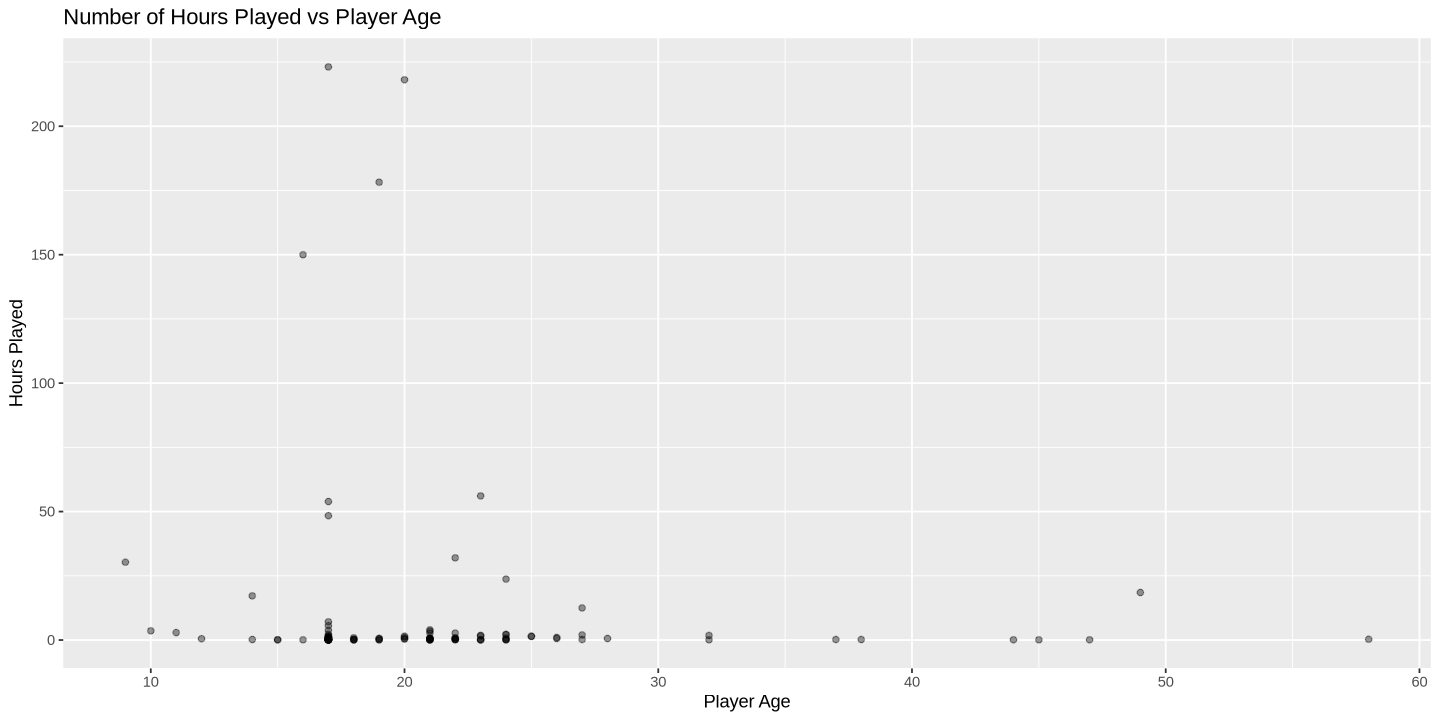

In [8]:
# Visualizations to better understand the data.

minecraft_plot1 <- ggplot(players_new, aes(x = Age, y = played_hours)) +
            geom_point(alpha = 0.4) +
            labs(
                x = "Player Age", 
                y = "Hours Played", 
                title = "Number of Hours Played vs Player Age")
            theme(text = element_text(size = 14))
minecraft_plot1

**Plot 1**: We can see that that there are two outliers in the graph, and will probably need to be scaled in order to prevent any imbalances in our classifications. 

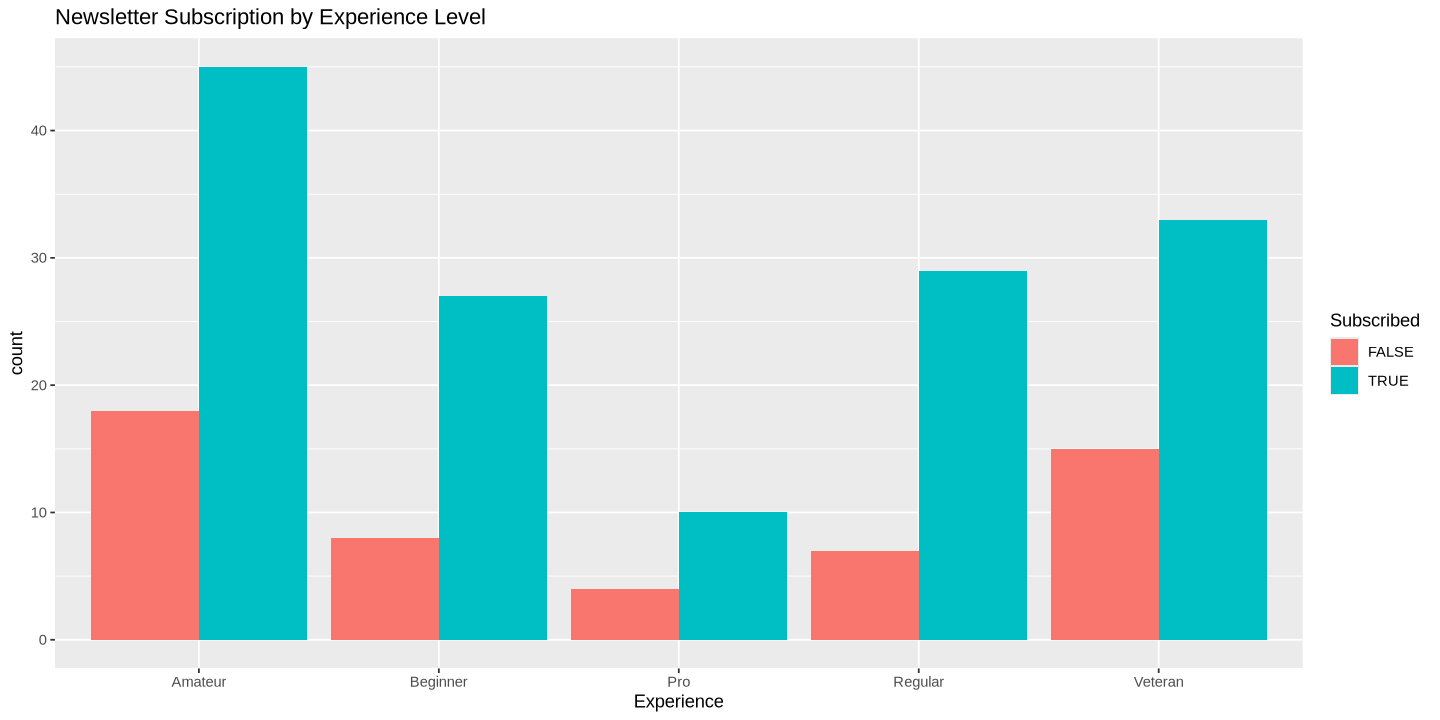

In [14]:
# Visualization: Subscription by Experience
minecraft_plot2 <- ggplot(players, aes(x = experience, fill = factor(subscribe))) +
  geom_bar(position = "dodge") +
  labs(title = "Newsletter Subscription by Experience Level", x = "Experience", fill = "Subscribed")
    theme(text = element_text(size = 14))

minecraft_plot2

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 14
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 14
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


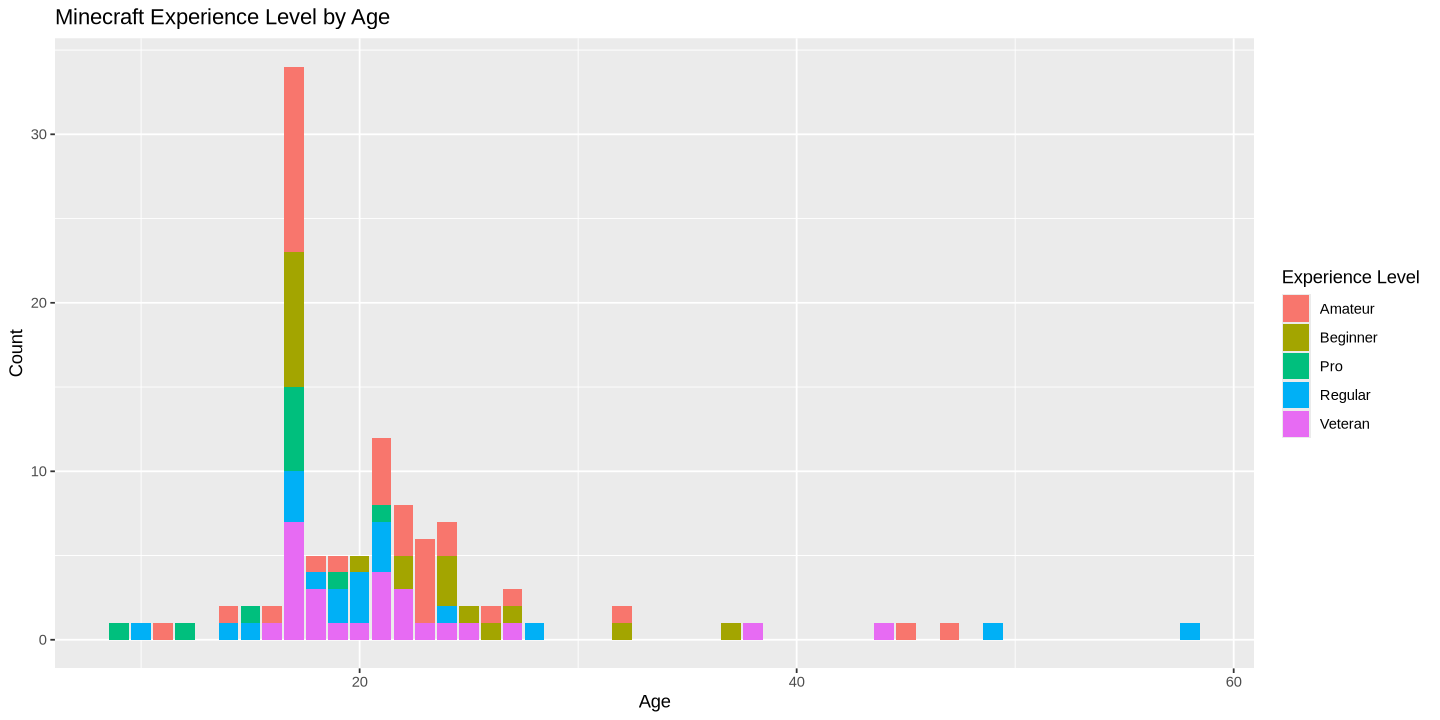

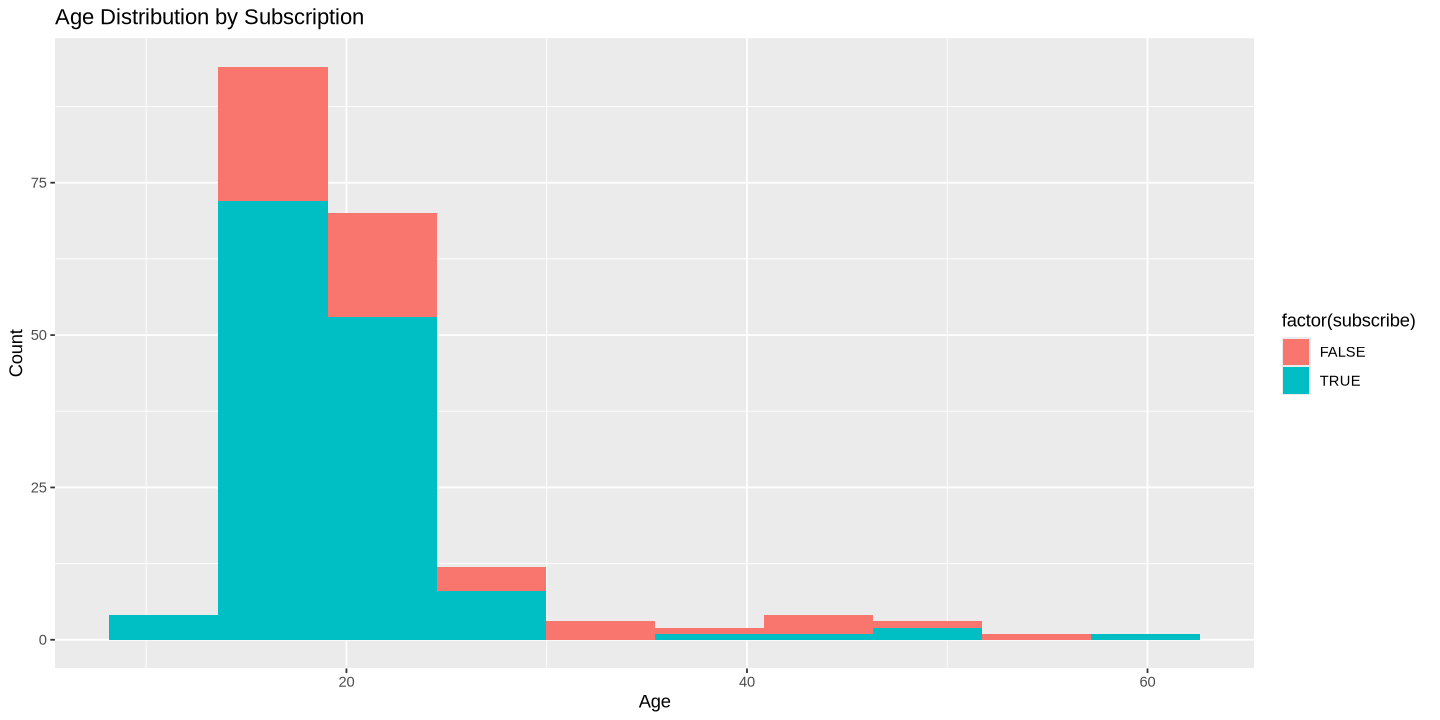

In [15]:
minecraft_plot3 <- ggplot(players_new, aes(x = Age, fill = experience)) +
    geom_bar() +
    labs(title = "Minecraft Experience Level by Age", 
         x = "Age", 
         y = "Count", 
         fill = 'Experience Level')
    theme(text = element_text(size = 14))

minecraft_plot3

# Histogram: Age distribution by subscription
minecraft_plot4 <- ggplot(players, aes(x = Age, fill = factor(subscribe))) +
  geom_histogram(bins = 10, position = "stack") +
  labs(title = "Age Distribution by Subscription", x = "Age", y = "Count")
    theme(text = element_text(size = 14))

minecraft_plot4

**Plot 3**: Here we can see that the Age vs Experience graph only highlights and focuses on a significant number of the player base - that being those who are 17. Therefore, this may pose an issue when classifying and impacting our precision/recall values. 

Additionally, the majority of participants' ages range from 17-28, so we may not be able to display results for experience levels of people outside of the age range. 

# References

Pacific Laboratory for Artificial Intelligence. (2025, September 11). *Pacific Laboratory for Artificial Intelligence.* https://plai.cs.ubc.ca/ 

*PLAICraft. (n.d.).* https://plaicraft.ai/